In [13]:
import pandas as pd
import streamlit as st
import numpy as np
import yfinance as yf
%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
start="2015-03-01"
end="2025-03-01"
stock="GOOG"
data= yf.download(stock,start,end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [6]:
data.reset_index(inplace=True)

Price,index,Date,Close,High,Low,Open,Volume
Ticker,,,GOOG,GOOG,GOOG,GOOG,GOOG
0,0,2015-03-02,28.386787,28.427031,27.761258,27.849697,42592618
1,1,2015-03-03,28.501062,28.588009,28.147307,28.342569,34095352
2,2,2015-03-04,28.487648,28.673468,28.221340,28.413121,37536775
3,3,2015-03-05,28.585030,28.713216,28.489635,28.569626,27792094
4,4,2015-03-06,28.205189,28.652102,28.159230,28.562669,33182854
...,...,...,...,...,...,...,...
2511,2511,2025-02-24,181.190002,185.089996,180.880005,183.800003,18734000
2512,2512,2025-02-25,177.369995,180.759995,176.770004,180.154999,20832500
2513,2513,2025-02-26,174.699997,178.080002,173.589996,176.945007,23637200


In [10]:
ma_100=data.Close.rolling(100).mean()


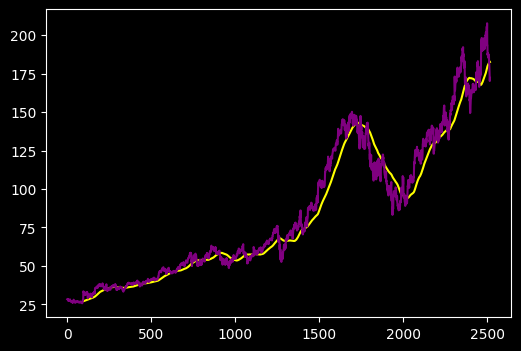

In [82]:
plt.figure(figsize=(6,4))
plt.style.use('dark_background')
plt.plot(ma_100,'yellow')
plt.plot(data.Close,'purple')
plt.show()

In [16]:
ma_200=data.Close.rolling(200).mean()

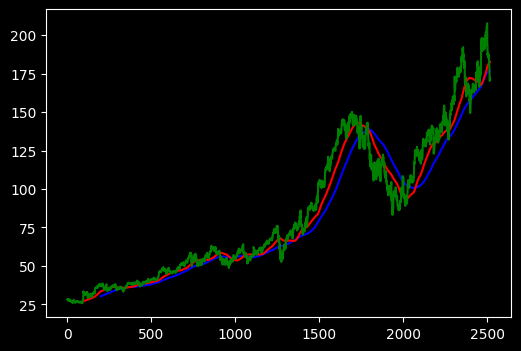

In [83]:
plt.figure(figsize=(6,4))
plt.style.use('dark_background')
plt.plot(ma_200,'b')
plt.plot(ma_100,'r')
plt.plot(data.Close,'g')
plt.show()

In [23]:
data.dropna(inplace=True)

In [25]:
data_train=data.Close[0:int(len(data)*0.8)]
data_test=data.Close[int(len(data)*0.8): int(len(data))]

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [31]:
datatrain_scale=scaler.fit_transform(data_train)

In [43]:
x=[]
y=[]
for i in range(100,len(datatrain_scale)):
    x.append(datatrain_scale[i-100:i])
    y.append(datatrain_scale[i,0])

In [45]:
x,y=np.array(x),np.array(y)

In [44]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [49]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True, input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [50]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [51]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 0.0842
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.0093
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0073
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0054
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.0052
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0071
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0052
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0054
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0054
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0049
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0046
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0051
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.0051
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0046
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.0045
Epoc

In [52]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [53]:
past100=data_train.tail(100)

In [63]:
data_test=pd.concat([past100,data_test],ignore_index=True)
data_test_scale=scaler.fit_transform(data_test)

In [65]:
x=[]
y=[]
for i in range(100,len(data_test_scale)):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x,y=np.array(x),np.array(y)


In [66]:
y_pred=model.predict(x)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [71]:
scale=1/scaler.scale_
y_pred=y_pred*scale
y=y*scale

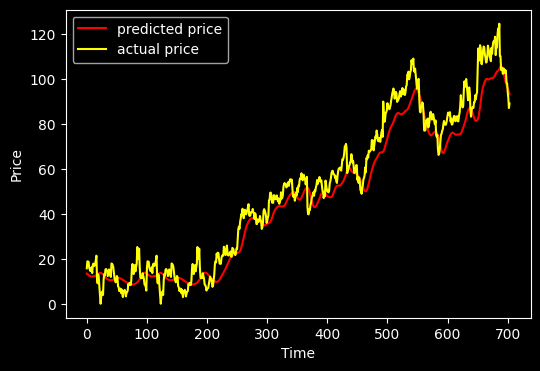

In [84]:
plt.figure(figsize=(6,4))
plt.style.use('dark_background')
plt.plot(y_pred,'red',label="predicted price")
plt.plot(y,'yellow',label='actual price')
plt.xlabel('Time',color='white')
plt.ylabel('Price',color='white')
plt.legend()
plt.show()

In [85]:
model.save('Stock Prediction Model.keras')